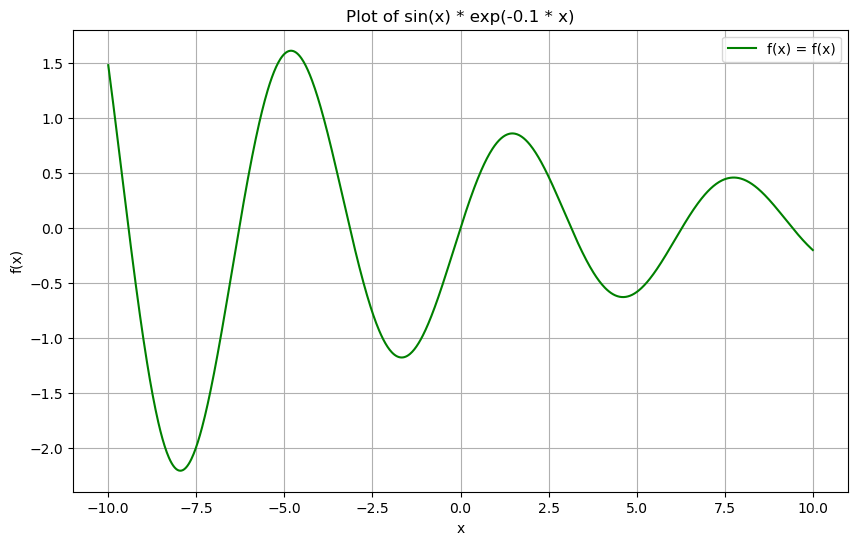

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_infinite_privacy_loss(func, x_range=(-10, 10), num_points=1000, title="Function Plot", xlabel="x", ylabel="f(x)", color="blue"):
    """
    Plots a function over a specified range.

    Parameters:
    - func: The function to plot (should take a single variable x).
    - x_range: A tuple specifying the range of x values (start, end).
    - num_points: Number of points to sample between the range.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.

    - ylabel: Label for the y-axis.
    - color: Color of the plot line.
    """
    # Generate x values
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    # Compute y values using the function
    y_values = [func(x) for x in x_values]

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, color=color, label=f"{ylabel} = f({xlabel})")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Define any function you want to plot
def example_function(x):
    return np.sin(x) * np.exp(-0.1 * x)

Gaussian
# Set parameters

plot_function(example_function, x_range=(-10, 10), title="Plot of sin(x) * exp(-0.1 * x)", color="green")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


What is our epsilonß
this[array(1.00229209e-08), [1.3154390836702713e-06, 1.315211018364424e-06, 1.3149829844877409e-06, 1.3147549820366376e-06, 1.3145270110082274e-06, 1.3142990713997388e-06, 1.3140711632077223e-06, 1.313843286428953e-06, 1.31361544106112e-06, 1.313387627100408e-06, 1.3131598445438017e-06, 1.3129320933885095e-06, 1.312704373631509e-06, 1.3124766852695747e-06, 1.3122490282996573e-06, 1.3120214027185313e-06, 1.3117938085233032e-06, 1.3115662457108084e-06, 1.3113387142780723e-06, 1.3111112142221541e-06, 1.310883745539611e-06, 1.3106563082275096e-06, 1.3104289022830234e-06, 1.3102015277026698e-06, 1.309974184483664e-06, 1.309746872622956e-06, 1.3095195921175176e-06, 1.309292342964082e-06, 1.3090651251594308e-06, 1.3088379387008264e-06, 1.3086107835852397e-06, 1.3083836598091741e-06, 1.308156567370109e-06, 1.307929506264392e-06, 1.3077024764895021e-06, 1.3074754780419023e-06, 1.3072485109189225e-06, 1.3070215751172833e-06, 1.3067946706339149e-06, 1.3065677974658765e-06, 1.

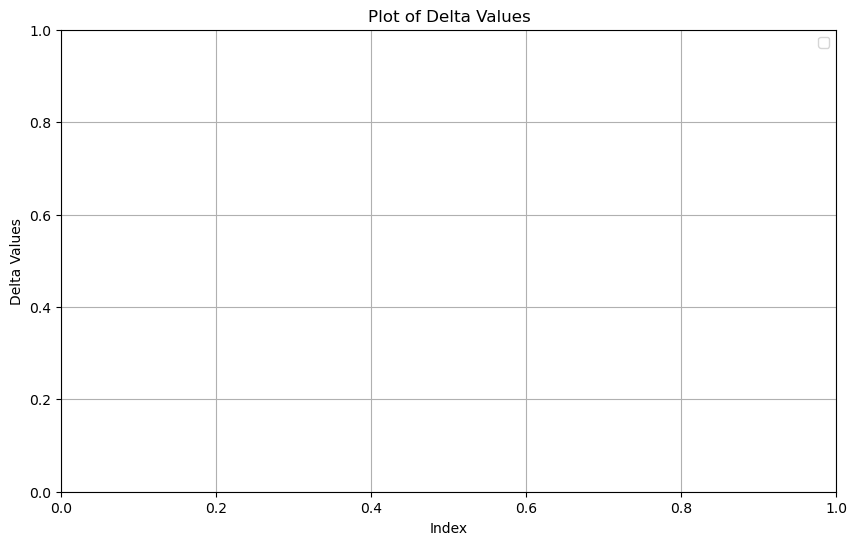

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [ ]:
# TODO: Figure out differences \epsilon_1, ... _3

# This is a manually edited version of the ChatGPT o4 outout
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# global funcs
analytic_gaussian = \
    lambda epsilon, mu :  norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
delta_bw = \
     lambda epsilon, mu: norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
tau_diff_func = \
    lambda delta, c_u, sigma: norm.ppf((1 - delta) ** (1 / c_u)) * sigma

# Root Finder for epsilon. TODO CHECK!
def findroot(candidate_epsilon, mu, delta):
    epsilon = candidate_epsilon
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (-1 / mu)
              - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / mu))
        epsilon = epsilon - f / fp
    return epsilon

# Root Finder for mu
def findrootmu(candidate_mu, epsilon, delta):
    mu = candidate_mu
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (1 / 2 + epsilon / mu**2) - delta
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / 2 + epsilon / mu**2))
        mu = mu - f / fp
    return mu

def gshm_delta(c_u, sigma, tau_diff, epsilon):
    delta_arr = [0]*c_u
    delta_arr2 = [0]*c_u
   # np.zeros(c_u)
   # delta_arr2 = np.zeros(c_u)

    for i in range(1, c_u + 1):
        a_eq = i - 1
        mu = np.sqrt(c_u - a_eq) / sigma
        epsilon2 = \
            epsilon - a_eq * np.log(norm.cdf(tau_diff / sigma))
        # Second part
       #  delta_arr[i - 1] = delta_second_part(tau_diff, sigma, a_eq, f) 
        delta_arr[i-1] = \
            1 - norm.cdf(tau_diff / sigma)**a_eq + norm.cdf(tau_diff / sigma)**a_eq * analytic_gaussian(epsilon2, mu)
        epsilon3 = \
            epsilon + a_eq * np.log(norm.cdf(tau_diff / sigma))
        delta_arr2[i - 1] = analytic_gaussian(epsilon3, mu)
    print("Finish")
    return [np.array(1 - norm.cdf(tau_diff / sigma)**c_u), 
                      delta_arr, 
                      delta_arr2]

# Fix parameters as in paper.
# Goal: Find minimal threshold for different amounts of k
c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 16176
epsilon = 0.4
all_deltas = gshm_delta(c_u, sigma, tau_diff, epsilon)
print(gshm_delta(c_u, sigma, tau_diff, epsilon))

print("What is our epsilonß")
print("this" + str(all_deltas))

# Plotting
plt.figure(figsize=(10, 6))
x_values = range(1, c_u + 1)

# Plot each line, handling scalar and array elements
#for i, delta_values in enumerate(all_deltas):
#    plt.plot(x_values, delta_values, label=f'Delta {i + 1}')

plt.xlabel('Index')
plt.ylabel('Delta Values')
plt.title('Plot of Delta Values')
plt.legend()
plt.grid(True)
plt.show()


eps_views = 0.349 # arbirary.
delta = 10**(-5) # target \delta
k = np.sqrt(c_u)
mu_arr = 0
extra_y = 0

#mu = findrootmu(np.sqrt(eps_views), eps_views, delta) ## WTF
#min_sigma = k / mu

# Covers a range of values. 
# Same strategy as in paper: Just iterate over all and find the required thresholds.
#sigma = np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 300, 0.01)))
sigma = np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1, 0.01))) 
tau_diff = np.zeros(len(sigma))
tau_diff_gshm = np.zeros(len(sigma))

# Create sigma, tau curve
mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
epsilon = findroot(0.01, mu, delta)

for i in range(len(sigma)):
#    mu = k / sigma[i]
    mu = np.sqrt((k / sigma[i])**2 + np.sum(np.array(mu_arr)**2))
#    delta_prime = delta_bw(epsilon, mu) # ADD DELTAS
#    delta_infinite = delta - delta_prime # ADD DELTAS
#    tau_diff[i] = tau_diff_func(delta_infinite, c_u, sigma[i]) # ADD DELTAS APPROACH
    tau_diff_gshm[i] = tau_diff_func(delta, c_u, sigma[i])
print(abs(gshm_delta(c_u, sigma[1], tau_diff_gshm[1], epsilon) - delta) < delta**2) # Why is this check necessary?
#mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
#epsilon = findroot(0.01, mu, delta)
print(abs(gshm_delta(c_u, sigma[1], tau_diff_gshm[1], epsilon) - delta))

#print(gshm_delta(C_u, sig, tau_, epsilon))

# Plotting Figure A
##min_y = min(np.min(tau_diff), np.min(tau_diff_gshm))
##max_y = max(np.max(tau_diff), np.max(tau_diff_gshm))

# Create sigma, tau curve
##mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
##min_sigma = k / mu

##mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))

# PLOTTING WILL BE ENABLED LATER.
#mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
#epsilon = findroot(0.01, mu, delta)epsilon = findroot(0.01, mu, delta)plt.figure(figsize=(10, 6))
#plt.plot(sigma, tau_diff, label="Add deltas", linewidth=2)
#plt.plot(sigma[::10], tau_diff_gshm[::10], color="blue", linestyle="--", linewidth=2, label="GSHM")
#plt.axvline(x=round(min_sigma), color="gray", linestyle=":", label=f"$\sigma = {round(min_sigma)}$")
#plt.ylim(min_y, max_y + extra_y)
#plt.xlabel(r"$\sigma$")
#plt.ylabel(r"$\tau^* - \tau$")
#plt.legend()
#plt.grid(True)
#plt.show()

In [ ]:
# Initial Convert due to ChatGPT o4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def delta_bw(epsilon, mu):
    return norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)

def tau_diff_func(delta, c_u, sigma):
    return norm.ppf((1 - delta) ** (1 / c_u)) * sigma

# Root Finder for mu
def findrootmu(candidate_mu, epsilon, delta):
    mu = candidate_mu
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (1 / 2 + epsilon / mu**2) - delta
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / 2 + epsilon / mu**2))
        mu = mu - f / fp
    return mu

# Root Finder for epsilon
def findroot(candidate_epsilon, mu, delta):
    epsilon = candidate_epsilon
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (-1 / mu)
              - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / mu))
        epsilon = epsilon - f / fp
    return epsilon

# General Result
def gshm_delta(c_u, sigma, tau_diff, epsilon):
    delta_arr = np.zeros(c_u)
    delta_arr2 = np.zeros(c_u)

    for i in range(1, c_u + 1):
        a_eq = i - 1
        mu = np.sqrt(c_u - a_eq) / sigma
        epsilon2 = epsilon - a_eq * np.log(norm.cdf(tau_diff / sigma))
        f = delta_bw(epsilon2, mu)

        delta_arr[i - 1] = 1 - norm.cdf(tau_diff / sigma)**a_eq + norm.cdf(tau_diff / sigma)**a_eq * f
        epsilon3 = epsilon + a_eq * np.log(norm.cdf(tau_diff / sigma))
        delta_arr2[i - 1] = delta_bw(epsilon3, mu)

    final_delta = max(1 - norm.cdf(tau_diff / sigma)**c_u, max(delta_arr), max(delta_arr2))
    return final_delta

# Parameters
c_u = 51914
eps_views = 0.349
delta = 10**(-5)
k = np.sqrt(c_u)
mu_arr = 0
extra_y = 0

# Create sigma, tau curve
mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
min_sigma = k / mu

mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
epsilon = findroot(0.01, mu, delta)

# Sigma values
sigma = np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 300, 0.01)))
tau_diff = np.zeros(len(sigma))
tau_diff_gshm = np.zeros(len(sigma))

for i in range(len(sigma)):
    mu = k / sigma[i]
    mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
    delta_prime = delta_bw(epsilon, mu)
    delta_infinite = delta - delta_prime
    tau_diff[i] = tau_diff_func(delta_infinite, c_u, sigma[i])
    tau_diff_gshm[i] = tau_diff_func(delta, c_u, sigma[i])

# Check tau_diff meets target delta for GSHM
# Not sure where this is used.
tau_diff_gshm_check = []
for i in range(0, len(sigma), 500):
    tau_diff_gshm_check.append(abs(gshm_delta(c_u, sigma[i], tau_diff_gshm[i], epsilon) - delta) < delta**2)
accuracy = sum(tau_diff_gshm_check) / len(tau_diff_gshm_check) # not used.

# Plotting Figure A
min_y = min(np.min(tau_diff), np.min(tau_diff_gshm))
max_y = max(np.max(tau_diff), np.max(tau_diff_gshm))

plt.figure(figsize=(10, 6))
plt.plot(sigma, tau_diff, label="Add deltas", linewidth=2)
plt.plot(sigma[::10], tau_diff_gshm[::10], color="blue", linestyle="--", linewidth=2, label="GSHM")
plt.axvline(x=round(min_sigma), color="gray", linestyle=":", label=f"$\sigma = {round(min_sigma)}$")
plt.ylim(min_y, max_y + extra_y)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\tau^* - \tau$")
plt.legend()
plt.grid(True)
plt.show()

# Parameters for epsilon-delta curves
delta_infinite = 10**(-8)
sigma = np.sqrt(c_u) / mu
eps_max = findroot(0.01, mu, delta_infinite)

# Delta-epsilon values for points on curve
delta_plot_vals = 10**np.arange(-8, -4, 1)
eps_plot_vals = [findroot(0.01, mu, dpv) for dpv in delta_plot_vals]

# Delta curves calculation
delta_arr_add_deltas_plot_vals = []
delta_arr_gshm_plot_vals = []
annotations = []

for eps in eps_plot_vals:
    delta_add = delta_bw(eps, mu) + delta_infinite
    tau_diff = tau_diff_func(delta_infinite, c_u, sigma)
    delta_gshm = gshm_delta(c_u, sigma, tau_diff, eps)
    delta_arr_add_deltas_plot_vals.append(delta_add)
    delta_arr_gshm_plot_vals.append(delta_gshm)
    annotations.append(f"$\delta_{{GSHM}}={round(delta_gshm, -int(np.log10(delta_gshm)))}$")

KeyboardInterrupt: 